# Introduction

This worksheet covers the three supervised learning algorithms we looked at in week 14: k-nearest neighbours, linear regression, and the naive Bayes classifier. Similar to last week, you will do some work implementing your own versions of these algorithms, to ensure that you understand the details of them. You will also compare them with the implementations in scikit-learn to test your implementations.

# Preliminaries
Import key packages: NumPy, matplotlib, and any others that you prefer to work with. In general, when writing code, you will put all your import statements at the top. However, for these worksheets we will import as we go along.

In [351]:
#TODO: import NumPy and matplotlib here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1: k-nearest neighbours classification
In this question we will use the k-nearest neighbours algorithm to make predictions on the breast cancer Wisconsin dataset. This is a classification problem where the aim is to classify instances as either being malignant or benign based on the following 10 features:
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter squared/ area −1)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension (‘coastline approximation’ −1)

In this question you will (a) download the dataset from sklearn and store the data and targets in suitable variables, (b) separate your data into a training and test split, (c) write your own function to implement k-nearest neighbours, (d) check your implementation with that of sklearn. Wethen go on to (e) select the most appropriate value of $k$ using cross-validation.

## Part (a)
Import the package `datasets` from `sklearn` and then load the breast cancer dataset (function is `load_breast_cancer()`). Save the data into a variable `X` and the targets into a variable `Y`. 
Take a look at the data in `X`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`).
Take a look at the targets. Is this suitable for a classification algorithm or a regression algorithm?

In [352]:
# Import suitable packages, load the dataset, and save data and targets into variables X and Y
# import packages
##TODO##
from sklearn import datasets
# load dataset and save data and targets into X and Y
##TODO##
X, Y = datasets.load_breast_cancer().data, datasets.load_breast_cancer().target
print(np.shape(X))
print(np.unique(Y))

(569, 30)
[0 1]


There are 569 datapoints, 30 features in the breast cancer dataset. The target values are 0 or 1, it is suitable for classification algorithm.

## Part (b)

Use the function `train_test_split` from `sklearn.model_selection` to split your data into a training set and a held-out test set. Use a test set that is 0.2 of the original dataset. Set the parameter `random_state` to 10 to help with replication.

In [353]:
# Import the package train_test_split from sklearn.model_selection.
# Split the dataset into Xtr, Xtest, Ytr, Ytest. Xtest and Ytest will form your held-out
# test set. You will later split Xtr and Ytr into training and validation sets.

from sklearn.model_selection import train_test_split as split

Xtr, Xtest, Ytr, Ytest = split(X, Y, test_size=0.2, random_state=10)

## Part (c) 
Recall from the lecture that the k-nearest neighbours algorithm runs as follows:

Training step: Simply store the dataset

Prediction step: Given a datapoint $\vec{x}$:
 - **Find** the k datapoints $(\vec{x}_i, y_i)$ where the distance from $\vec{x}$ to $\vec{x}_i$ is smallest
 - **Return** the majority class from the $y_i$
   
 
What, if anything, do you need to do for the training step?

Write function(s) to implement the k-nearest neighbours prediction step. You may wish to break the procedure down into two functions `predict_datapoint` that makes a prediction for one datapoint and `predict_data` that loops over the whole dataset.

To select the majority class from the nearest neighbours, you can use the function `scipy.stats.mode()`


In [354]:
from scipy.stats import mode
# Write function(s) to implement the prediction step in k-nearest neighbours.
# You can use the suggested structure below if desired.


# predict_datapoint takes 4 arguments. pt (type: numpy array) is the datapoint we are making a prediction about,
# Xtrain and Ytrain (numpy arrays) are training data and targets, k (int) is the number of neighbours.
# Returns an integer which is the predicted class for pt
def predict_datapoint(pt, Xtrain, Ytrain, k):
    # For each datapoint in Xtrain, calculate the distance to pt and store
    ##TODO##
    distance_arr = []
    for i in Xtrain:
        distance_arr.append(np.sqrt(np.sum(np.square(pt-i))))
    # Sort the list of distances (hint: use np.argsort)
    ##TODO##
    order_index = np.argsort(distance_arr)
    # obtain the classes (in Ytrain) of the datapoints with the smallest distance to pt
    ##TODO##
    nei_labels = []
    for i in range(k):
        nei_labels.append(Ytrain[order_index[i]])
    # return the mode of the classes
    ##TODO##
    return mode(nei_labels)[0][0]

# predict_data takes 4 arguments: the test data Xtst (numpy array), the training data Xtrain (numpy array),
# the training targets Ytrain (numpy array), and the number of neighbours k (int, default = 3).
# Returns: predictions (array of int) for each point in Xtst


def predict_data(Xtst, Xtrain, Ytrain, k=3):
    # Loop over the datapoints in Xtst and store the prediction for that datapoint
    ##TODO##
    pred_tst = []
    for pt in Xtst:
        pred_tst.append(predict_datapoint(pt, Xtrain, Ytrain, k))
    # Return the predictions
    ##TODO##
    return pred_tst
# Predict values for the TRAINING data (we will not look at the test set yet)
##TODO##
pred_train = predict_data(Xtr,Xtr,Ytr)

## Part (d)
Now we can compare your implementation with the sklearn implementation (you should get the same results). Firstly import the classfifier `KNeighborsClassifier` from `sklearn.neighbors`. Instantiate the classifier with the same number of neighbours that you used previously. Fit the model and make a prediction on the test set.

In [355]:
# Import KNeighborClassifier
##TODO##
from sklearn.neighbors import KNeighborsClassifier
# Instantiate the classifier with 3 neighbors
##TODO##
knnClassi =  KNeighborsClassifier(n_neighbors=3)
#Fit the classifier on the training data
##TODO##
knnClassi.fit(Xtr,Ytr)
#Make a prediction on the training data
##TODO##
predTrain_sklearn = knnClassi.predict(Xtr)

Check whether your predictions are the same as the predictions from `KNeighborsClassifier`.

In [356]:
##TODO##
print((predTrain_sklearn == pred_train).all())

True


Use the built in metrics in sklearn to calculate the accuracy of your classifier on the TRAINING set.

In [357]:
##TODO## 
knnClassi.score(Xtr,Ytr)

0.9560439560439561

## Part(e) Using cross-validation for model selection
k-nearest neighbours has the parameter $k$, and we need to decide which is the best value of $k$ to use. Last week we talked about using cross-validation for model selection.

We will use cross-validation on our training set to select the best value of $k$, in a range from 1 to 30.

NB: use sklearn's version of k-NN rather than yours, since unless you have optimised yours it is probably too slow.

Since we are using cross-validation for model selection we will cross-validate on the training set only.

Procedure:
        
 1. Import `KFold` from `sklearn.model_selection`  
 1. Instantiate `KFold` with 5 splits. Set the parameter `random_state` to help you reproduce your results if needed.
 1. Set a variable `max_k` to 30  
 1. Inititalise two variables to store the training accuracies and validation accuracies (these need to store max_k\*5 accuracies)  
 1. Loop over the values of k:  
    1. Instantiate a k-nn classifier (Use the sklearn classifier) with the current value of k  
    1. Loop over the cross-validation splits:  
       1. fit the model on the current split of data  
       1. make predictions  
       1. calculate training and validation accuracy and store  
 6. Calculate the mean training and validation accuracies across splits for each $k$

Plot the mean training and validation accuracies. Which value of $k$ will you use? Why?
    

In [358]:
# Use cross-validation to select the value of k
# You can use the structure below if desired
from sklearn.metrics import accuracy_score
# Import KFold from sklearn.model_selection
##TODO##
from sklearn.model_selection import KFold
# Instantiate KFold with 5 splits.
# Set the parameter random_state to help you reproduce your results if needed.
##TODO##
kf = KFold(n_splits=5, random_state=10, shuffle=True)
# Set a variable max_k to 30
##TODO##
max_k = 30
# Inititalise two variables to store the
# training accuracies and validation accuracies
# (these need to store max_k*5 accuracies)
##TODO##
acc_training = [[] for _ in range(max_k)]
acc_val = [[] for _ in range(max_k)]
# Loop over the values of k:
for k in range(max_k):

    # Instantiate a k-nn classifier (Use the sklearn classifier)
    # with the current value of k
    ##TODO##
    knn = KNeighborsClassifier(n_neighbors = k + 1)
    # Loop over the cross-validation splits:
    ##TODO##
    for train_index, val_index in kf.split(Xtr):
        x_train, x_val = Xtr[train_index], Xtr[val_index]
        y_train, y_val = Ytr[train_index], Ytr[val_index]
        # fit the model on the current split of data
        ##TODO##
        knn.fit(x_train, y_train)
        # make predictions
        ##TODO##
        pred_y_train = knn.predict(x_train)
        pred_y_val = knn.predict(x_val)
        # calculate training and validation accuracy and store
        ##TODO##
        acc_training[k].append(accuracy_score(y_train,pred_y_train))
        acc_val[k].append(accuracy_score(y_val,pred_y_val))
# Calculate the mean training and validation accuracies across splits for each 𝑘
##TODO##
mean_acc_tr_eachk = np.mean(acc_training, axis=1)
mean_acc_val_eachk = np.mean(acc_val, axis = 1)
print(mean_acc_tr_eachk)
print(mean_acc_val_eachk)


[1.         0.96758242 0.95934066 0.9521978  0.9510989  0.94725275
 0.94340659 0.94505495 0.94285714 0.94285714 0.93901099 0.93901099
 0.93571429 0.93791209 0.93626374 0.93681319 0.93681319 0.93571429
 0.93406593 0.93516484 0.93076923 0.93131868 0.92857143 0.92967033
 0.92637363 0.92637363 0.92307692 0.92417582 0.91978022 0.92142857]
[0.91428571 0.91868132 0.92747253 0.92307692 0.92747253 0.92967033
 0.93186813 0.94065934 0.94065934 0.93846154 0.92747253 0.92967033
 0.93186813 0.93406593 0.93406593 0.93406593 0.92967033 0.93186813
 0.92747253 0.93186813 0.93186813 0.92967033 0.92527473 0.92747253
 0.92307692 0.92307692 0.92307692 0.92527473 0.92527473 0.92527473]


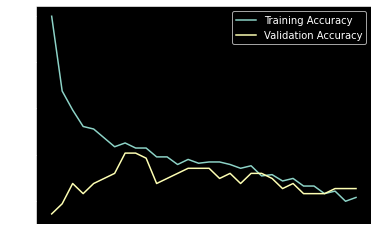

In [359]:
# Plot the mean training and validation accuracies against each value of k. Which value of 𝑘 will you use? Why?
##TODO##
plt.plot(np.linspace(0, 30, 30),mean_acc_tr_eachk)
plt.plot(np.linspace(0, 30, 30),mean_acc_val_eachk)
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

# The naive Bayes classifier

Recall from the lecture notes that the naive Bayes classifier works as follows. We are trying to approximate an unknown function $$f:\Omega \rightarrow \mathcal{O}$$
where $\Omega$ is our feature space and our output space $\mathcal{O} = \{c_1, c_2, ... c_K\}$ is a finite set of classes.

The naive Bayes classifier does this by building a model that assigns the class label $\hat{y} = c_k$ as follows:
$$
\hat{y} = \text{argmax}_k p(c_k)\prod_i p(x_i| c_k)
$$
i.e., the $k$ that maximises this quantity.

In practice, multiplying all the $p(x_i| c_k)$ together is going to give some very small values. Therefore, we can take the log to make it easier to compute:
\begin{align}
\hat{y} &= \text{argmax}_k p(c_k)\prod_i p(x_i| c_k)= \text{argmax}_k log(p(c_k)\prod_i p(x_i| c_k))\\
&=\text{argmax}_k log(p(c_k)) + \sum_i log(p(x_i|c_k))
\end{align}

If we choose that $p(x_i|c_k)$ is given by a normal distribution with mean $\mu_k$ and variance $\sigma_k^2$, then we obtain the following expression:

\begin{align}
\hat{y} &=\text{argmax}_k \log(p(c_k)) + \sum_i \log(p(x_i|c_k))\\
&= \text{argmax}_k \log(p(c_k)) + \sum_i \log\left(\frac{1}{\sigma_k\sqrt{2\pi}} exp\left(\frac{-(x-\mu_k)^2}{2\sigma_k}\right)\right)\\
&= \text{argmax}_k \log(p(c_k)) - \sum_i \log\left(\sigma_k\sqrt{2\pi}\right) - \sum_i\left(\frac{(x-\mu_k)^2}{2\sigma_k}\right) \quad \text{ log-likelihood}
\end{align}

Expressing the values in terms of these sums means that they do not get so small, and it is less likely that there will be errors at the machine precision level.


How do we implement this in practice? We assume that each probability $p(x_i| c_k)$ is given by some distribution, and then given a datapoint $\vec{x}$, we plug the value into the equation for the distribution.

In this question you will (a) implement your own version of the Gaussian naive Bayes classifier, (b) check your classifier against the implementation in sci-kit learn, (c) compare the accuracy of the naive Bayes classifier with the accuracy of the k-nearest neighbours classifier, and (d) run cross-validation to verify whether the kNN classfier or the Gaussian naive Bayes classifier performs better on this dataset.

## Part (a) Implementing Gaussian naive Bayes
For this question we will make the assumption that each feature is described by a normal (also called Gaussian) distribution. The procedure is as follows:
1. Divide the training data by class
2. Calculate mean and standard deviation per class and per feature
4. For each datapoint in the validation set, calculate the log-likelihood for each class and for each feature (Hint: use the function `scipy.stats.norm.logpdf`)
5. Combine these values together with the probability of the class according to the log-likelihood equation above
6. Choose the class with the highest value


In [360]:
##TODO##
# Write your own implementation of naive Bayes applied to the breast cancer dataset.

# If you wish you can follow the structure below
from scipy.stats import norm

# Split the training data Xtr into training and validation sets with an 80:20 split.
# Set the random state to help with reproducibility
##TODO##
x_train_bay, x_val_bay, y_train_bay, y_val_bay = split(
    Xtr, Ytr, test_size=0.2, random_state=10)
# Separate the training set into classes, so you have one set of data for each class
##TODO##
x_train_class0 = []
x_train_class1 = []
for index, val in enumerate(x_train_bay):
    if y_train_bay[index] == 0:
        x_train_class0.append(val)
    if y_train_bay[index] == 1:
        x_train_class1.append(val)

# Calculate the means and standard deviations for each class, for each feature.
# There are 30 features in the dataset, so you should have a 30-dimensional
# array of means for each class and a 30-dimensional array of standard deviations
# for each class. Remember that you can take the average across rows or columns of
# a matrix by specifying axis = 1 or axis = 0
##TODO##
mean_class0 = np.mean(x_train_class0, axis=0)
std_class0 = np.std(x_train_class0, axis=0)
mean_class1 = np.mean(x_train_class1, axis=0)
std_class1 = np.std(x_train_class1, axis=0)
# Calculate the prior probability p(c_i) for each class
##TODO##
p_ci_class0 = len(x_train_class0)/len(x_train_bay)
p_ci_class1 = len(x_train_class1)/len(x_train_bay)
# Calculate the log-likelihood of each class for each datapoint in the validation set
# Hint: you can use the function scipy.stats.norm.logpdf to help with this
##TODO##
log_likeli_class0 = []
log_likeli_class1 = []
for index, val in enumerate(x_val_bay):
    log_likeli_class0.append(np.sum(norm(mean_class0, std_class0).logpdf(val)))
    log_likeli_class1.append(np.sum(norm(mean_class1, std_class1).logpdf(val)))

# Your predicted class is 0 if class 0 has the highest log-likelihood, and 1 if class 1
# has the highest log-likelihood
##TODO##

pred_y_val = []
for index, val in enumerate(log_likeli_class0):
    if log_likeli_class1[index] > val:
        pred_y_val.append(1)
    else:
        pred_y_val.append(0)
print(pred_y_val)

[1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]


## Part (b) Checking results
We now compare our results with the sklearn implementation. 

In [361]:
##Import the classifier GaussianNB from sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB
# Instantiate the classifier (use the parameter var_smoothing=0.0),
# fit, and predict the classes
##TODO##

naive_bayes = GaussianNB(var_smoothing=0.0)
naive_bayes.fit(x_train_bay,y_train_bay)
pred_y_val_bayes_sklearn = naive_bayes.predict(x_val_bay)
print(pred_y_val_bayes_sklearn) 

[1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1
 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1]


In [362]:
# Compare your predicted classes with those of the sklearn implementation.
# If they are not identical, this may be due to some differences in parameter setting. 
# They should be almost all the same, however.
##TODO##
print((pred_y_val_bayes_sklearn == pred_y_val).all())

True


## Part (c) Comparing k-nearest neighbours and Gaussian naive Bayes
Now retrain the naive Bayes classifier using the original training set `Xtr`, `Ytr`.
Also, retrain the k-nearest neighbours classifier using `Xtr` and `Ytr`. Use the value of $k$ that you decided on using cross-validation.
You can use the sklearn implementations of knn and naive Bayes.

Compute the accuracy of the naive Bayes classifier over the training set and the held-out test set.

Compare with the accuracy of the k-nearest neighbours classifier on each set.

Is it clear which classifier is the best on this dataset? why or why not?

In [363]:
# Instantiate the knn classifer with your chosen value of k
##TODO##
knn2 = KNeighborsClassifier(n_neighbors=8)
# Fit the Gaussian naive Bayes classifier and the knn classifier on Xtr, Ytr
##TODO##
naive_bayes.fit(Xtr,Ytr)
knn2.fit(Xtr,Ytr)
# Make predictions for the training set and the test set
##TODO##
pred_train_knn = knn2.predict(Xtr)
pred_test_knn = knn2.predict(Xtest)
pred_train_naive_bayes = naive_bayes.predict(Xtr)
pred_test_naive_bayes = naive_bayes.predict(Xtest)
# Take a look at the accuracy scores
##TODO##
acc_train_knn = knn2.score(Xtr,Ytr)
acc_test_knn = knn2.score(Xtest,Ytest)
acc_train_naive_bayes = naive_bayes.score(Xtr,Ytr)
acc_test_naive_bayes = naive_bayes.score(Xtest,Ytest)
print("Accuracy for knn on training dataset: {}:".format(acc_train_knn))
print("Accuracy for knn on test dataset: {}:".format(acc_test_knn))
print("Accuracy for naive bayes on training dataset: {}:".format(acc_train_naive_bayes))
print("Accuracy for naive bayes on test dataset: {}:".format(acc_test_naive_bayes))


Accuracy for knn on training dataset: 0.945054945054945:
Accuracy for knn on test dataset: 0.9298245614035088:
Accuracy for naive bayes on training dataset: 0.9274725274725275:
Accuracy for naive bayes on test dataset: 0.956140350877193:


## Part (d) Using cross-validation for statistical validation
Earlier we used cross-validation to select the model parameters we would be using. We can also use it another way: to provide statistical information about which model is best. We will set up cross-validation on the whole dataset, with 10 folds.

 - Compute the accuracy for each model on the test set on each fold.
 - Calculate the mean accuracy across folds. Which model performs best?
 - Make a box-plot of the spread of scores of each model. Is there a clear difference between model performance?
 - Perform a paired t-test on the accuracy scores. What can you conclude about the performance of the two models?


In [364]:
# Set up a k-fold cross-validation with 10 folds
##TODO##
kf = KFold(n_splits=10, shuffle=True)

In [365]:
acc_test_knn_per_fold = []
acc_test_naive_bayes_per_fold = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    modelnb = naive_bayes.fit(X_train, Y_train)
    modelknn = knn2.fit(X_train, Y_train)
    Ypredknn=modelknn.predict(X_test)
    Yprednb=modelnb.predict(X_test)
    acc_test_knn_per_fold.append(accuracy_score(Y_test,Ypredknn))
    acc_test_naive_bayes_per_fold.append(accuracy_score(Y_test,Yprednb))
print(acc_test_knn_per_fold)
print(acc_test_naive_bayes_per_fold)

[0.9473684210526315, 0.9649122807017544, 0.8947368421052632, 0.9473684210526315, 0.9473684210526315, 0.9122807017543859, 0.9473684210526315, 0.8771929824561403, 0.9298245614035088, 0.9642857142857143]
[0.9824561403508771, 0.8947368421052632, 0.9649122807017544, 0.9298245614035088, 0.8947368421052632, 0.9473684210526315, 0.9122807017543859, 0.8771929824561403, 0.9649122807017544, 0.9285714285714286]


In [366]:
# Compute the mean and standard devation of the accuracies for each model.
# Does one model perform better?
##TODO##
acc_mean_CV_knn = np.mean(acc_test_knn_per_fold)
acc_std_CV_knn =  np.std(acc_test_knn_per_fold)
acc_mean_CV_naive_bays = np.mean(acc_test_naive_bayes_per_fold)
acc_std_CV_naive_bays = np.std(acc_test_naive_bayes_per_fold)
print(f'knn: mean={acc_mean_CV_knn}, sd={acc_std_CV_knn}')
print(f'nb: mean={acc_mean_CV_naive_bays},sd={acc_std_CV_naive_bays}')

knn: mean=0.9332706766917293, sd=0.028000228932478922
nb: mean=0.9296992481203008,sd=0.03328925610114719


The average of Accuracies for naive bays is more than that for knn and the standard deviation of Accuracies for naive bays is less than that for knn. This means the naive bays model has generally better performance on this current dataset.

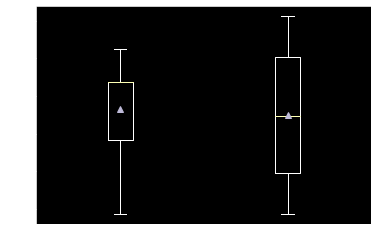

In [367]:
# Make a boxplot of the accuracy scores. (Use plt.boxplot). 
# Is there a clear difference between the models?
##TODO##
labels = 'The accuracy for knn', 'The accuracy for naive bays'
plt.boxplot([acc_test_knn_per_fold, acc_test_naive_bayes_per_fold], labels = labels, showmeans=True)
plt.show()

The range of accuracies for knn varies more than that for naive bays. And most accuracy values for naive bays is over 0.93 and most accuracy values for knn is below 0.94.

In [368]:
# Perform a paired t-test (you can use the function scipy.stats.ttest_rel). 
# What do you conclude about the performance of the two models?
##TODO##
from scipy.stats import ttest_rel
t_sta, p_value = ttest_rel(acc_test_knn_per_fold,acc_test_naive_bayes_per_fold)
print("T statistics: {}".format(t_sta), "P value: {}".format(p_value))

T statistics: 0.2458051216362956 P value: 0.8113469769421704


The average of Accuracies for knn is more than that for naive bays, and we reject to admit these two models have the same performance under 95% confidence level. 

## Linear Regression
In linear regression we make the assumption that the data $(x_i, y_i)$ can be modelled by a function of the form
$$ \hat{y_i} = f(\vec{x}_i)= \sum_j a_j x_{ij}  + b_i$$

Recall that we can express this in a matrix format by:
$$ \hat{\vec{y}} = f(X)= X\Theta$$

where 
$$ X=\begin{pmatrix}
x_{1,1} & x_{1,2} & \ldots & x_{1,n} &1 \\
\vdots & \vdots & \ldots & \vdots & \vdots \\
x_{N,1} & x_{N,2} & \ldots & x_{N,n} & 1
\end{pmatrix}, \quad \vec{y}=\begin{pmatrix} y_1 \\ \vdots \\y_N \end{pmatrix}, \quad \Theta=\begin{pmatrix} a_1 \\ \vdots \\a_n\\b \end{pmatrix}$$

We saw in lectures that the optimal value of $\Theta$ is given by setting
$$ \Theta = (X^T X)^{-1} X^T \vec{y}$$

The quantity $(X^T X)^{-1} X^T$ is called the psuedoinverse of X, and can be computed using the function `np.linalg.pinv`.

We will (a) perform a linear regression on the diabetes dataset. You can load this dataset using the function `load_diabetes` from `sklearn.datasets`. (b) compute the mean squared error and the R^2, and (c) compare your results with the built in function in sklearn (`sklearn.linear_model.LinearRegresion()`). You should get the same results.

In [369]:
# import statments here
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Part (a) Implementing linear regression

In [370]:
# Load the diabetes dataset
##TODO##
from sklearn.datasets import load_diabetes
X, Y = load_diabetes().data, load_diabetes().target
print(np.shape(X),np.shape(Y))
# Split the dataset into training and test, using test_size=0.2
##TODO##
Xtr, Xtest, Ytr, Ytest = split(X, Y, test_size=0.2, random_state=0)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtr, Ytr, test_size=0.2, random_state=0)

(442, 10) (442,)


In [371]:
# Add a column of ones to Xtrain and Xtest for the intercept term
##TODO##
Xtrain = np.column_stack((Xtrain, np.linspace(1,1,len(Xtrain))[:,None]))
Xtest = np.column_stack((Xtest, np.linspace(1,1,len(Xtest))[:,None]))
Xval = np.column_stack((Xval, np.linspace(1,1,len(Xval))[:,None]))
print(np.shape(Xtrain),np.shape(Xtest))

(282, 11) (89, 11)


In [372]:
# Calculate the value of the coefficients theta. You can use the function np.linalg.pinv
##TODO##
pseudo_inverse = np.linalg.pinv(Xtrain)
theta = np.dot(pseudo_inverse,  Ytrain[:,None])
print(theta)

[[ -41.59905539]
 [-205.26262991]
 [ 496.35406326]
 [ 404.62449821]
 [-741.54847981]
 [ 339.81181496]
 [ 156.184559  ]
 [ 289.83586499]
 [ 741.34921997]
 [  41.42142468]
 [ 151.91611294]]


## Part (b) Computing performance metrics

In [373]:
# Make a prediction on the test set by applying the coefficients theta to the test set
##TODO##
pred_y_test = np.dot(Xval,theta).T[0]
print(pred_y_test)


[107.91779133 172.56473042 161.86379845 172.48199764 224.46456579
 159.23391034 104.27079311 115.61207201 202.41720688 248.23893689
 209.96949695 202.66190878 178.76761607 219.83571752 155.64352021
 195.82249873 171.74018761  63.91769629 298.82886394 162.85053486
 158.39077543 261.7038252   68.23938605 193.3605231  154.74359369
  71.72738532 169.3524693  188.98498042 218.31413782  94.67037108
  97.43869018 124.40693902 246.23986142 109.43898422  85.70252258
 216.05542744 265.38327667 157.53539378 117.54798151 181.7566324
 113.47402877 173.2945885  235.88480247 105.09224875 286.23318029
 146.78685996 137.81664605 158.56049604 119.22393468 103.62852045
 119.43291964 145.66144185 229.52324748  94.33255961 237.31049881
 205.55746033 212.58055774 139.28729246 118.25008131  43.82295536
 143.35647314 292.1122562  130.34527735 107.31471871 185.69041555
 262.62767558 113.77882433 175.97978918  84.58872343 196.38062662
 242.15833638]


In [374]:
print(Yval)

[ 72.  85. 185. 258. 268.  91. 101. 177. 220. 252. 275. 248.  77. 225.
 206. 265. 225.  52. 242. 151. 109. 245.  77. 161. 155.  55.  58. 178.
 163.  72.  94. 111. 306. 183. 201. 166. 263. 200.  60.  90. 160. 138.
 258.  47. 243. 219. 172. 154. 139.  65. 162. 168. 248.  81. 208. 288.
 310.  81. 200.  55. 182. 270.  65. 111.  67. 346.  88. 262.  60. 229.
 259.]


In [375]:
# Calculate the mean squared error and the R^2. 
# You can use the built in functions from sklearn
from sklearn import metrics
##TODO##
mse = metrics.mean_squared_error(pred_y_test,Yval)
r2 = metrics.r2_score(pred_y_test,Yval)
print(mse,r2)

2837.4607301263336 0.19407106856255818


## Part (c) Checking results
Compare your results with the built in function `sklearn.linear_model.LinearRegression()`

In [376]:
# Instantiate the linear regression
##TODO##
from sklearn.linear_model import LinearRegression as lr
linear_regression = lr()


In [377]:
# Fit the model and make a prediction on the test set. Compare with your implementation
##TODO##
linear_regression.fit(Xtrain,Ytrain)
pred_sklearn_linear = linear_regression.predict(Xtest)
print(pred_sklearn_linear)
linear_regression.score(Xtest, Ytest)

[238.43431847 247.04022809 166.08210257 114.10316741 196.35489722
 247.33454754 113.30174138 189.49969148 137.9445329  233.30781786
 168.82712934 175.40980603 104.8903642   80.80982875 246.28510359
  89.95846972 158.09774626  70.40853897 100.28225919 219.87967242
 198.33352839 153.34801222 167.58827274 143.54949377 192.0633016
 161.69710076 142.11198264  81.79035572 198.21988539 159.30493058
 188.06249989  82.31631289 142.89124306 140.59968088 136.24435267
 195.16577344 161.16237895 199.61017429 125.04007102 204.08546119
  78.26766074 166.65720881 136.58705372 177.43841829 181.69857612
  72.67698744 150.49316963 136.2112989  121.29897325 239.18724635
 163.52776402  75.27316817 159.76328205 154.777075   238.25383643
 187.78096509 187.57797443 114.68932695 129.44217048 169.73414973
 205.33867228 168.62670391 145.15767172 108.2592383  243.82299014
 147.02794534  74.16903616 225.03819178 202.0786885   53.83182463
  75.91734074 132.73940144 101.42399281 137.28527271 131.55951992
 200.722232

0.34568954941931895

Visualise the perfomance of the regression by plotting your predicted values vs target values on a scatter plot, and drawing a line y=x. If all predictions were perfect, the predicted values would lie on the line.

89


Text(0, 0.5, 'predicted value')

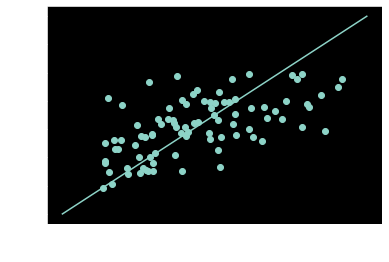

In [378]:
# Plot predicted values vs target values on a scatter plot, and drawing a line y=x
## TODO##
print(len(Xtest))
fig, ax = plt.subplots()
ax.scatter(Ytest, pred_sklearn_linear, label='Data')
x_axis = np.linspace(0,350,100)
y_axis = x_axis
plt.plot(x_axis,y_axis)
plt.xlabel('target')
plt.ylabel('predicted value')


# Extra question: Polynomial regression
The term 'linear' in linear regression refers only to the coefficients $\theta$. We can in fact compute polynomial terms in the data and perform linear regression over this extended dataset to get a better fit to the data.

To compute polynomial terms in the data automatically, you can use the class `sklearn.preprocessing.PolynomialFeatures`. To find out how to use it, look at the guidance (you can type `help(PolynomialFeatures)` once you have imported it).

The following small dataset (in the cell below) gives a relationship between temperature and yield for an experiment. Use cross-validation to select the degree of the polynomial that best fits this data.

Plot the mean squared error against degree on the training set and on the validation set. Which degree of polynomial best fits this data?

In [379]:
# Data
X = np.array([50,50,50,70,70,70,80,80,80,90,90,90,100,100,100]).reshape(-1, 1)
y = np.array([3.3,2.8,2.9,2.3,2.6,2.1,2.5,2.9,2.4,3,3.1,2.8,3.3,3.5,3]).reshape(-1, 1)

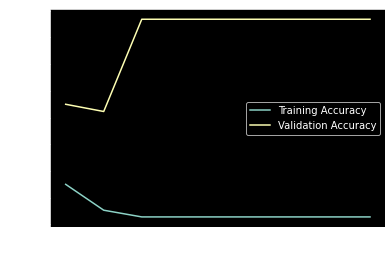

In [381]:
from sklearn.preprocessing import PolynomialFeatures
kf = KFold(n_splits=5, random_state=0, shuffle=True)
max_degree = 10
degrees = np.arange(2, max_degree + 1)
mse_train = [[] for _ in range(max_degree-1)]
mse_test = [[] for _ in range(max_degree-1)]
for i, degree in enumerate(degrees):
    ploy = PolynomialFeatures(degree)
    for train_index, test_index in kf.split(X):
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        x_train_fitted = ploy.fit_transform(Xtrain)
        x_test_fitted = ploy.fit_transform(Xtest)
        linear_regression.fit(x_train_fitted, ytrain)
        pred_train = linear_regression.predict(x_train_fitted)
        pred_test = linear_regression.predict(x_test_fitted)
        mse_train[i].append(metrics.mean_squared_error(ytrain, pred_train))
        mse_test[i].append(metrics.mean_squared_error(ytest, pred_test))
mean_mse_train = np.mean(mse_train, axis=1)
mean_mse_test = np.mean(mse_test, axis=1)
plt.plot(np.linspace(2,max_degree, max_degree-1),mean_mse_train)
plt.plot(np.linspace(2,max_degree, max_degree-1),mean_mse_test)
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.xlabel('degree')
plt.ylabel('mean squard error')
plt.show()